 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path('Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path('Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path('Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [11]:
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [12]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change()
sp500_df

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [13]:
sp500_df.isnull().sum()

Close    1
dtype: int64

In [14]:
# Drop nulls
sp500_df = sp500_df.dropna()
sp500_df

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [15]:
sp500_df.isnull().sum()

Close    0
dtype: int64

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns={
    'Close': 'S&P500'
})
sp500_df

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_df], axis='columns', join='inner')
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

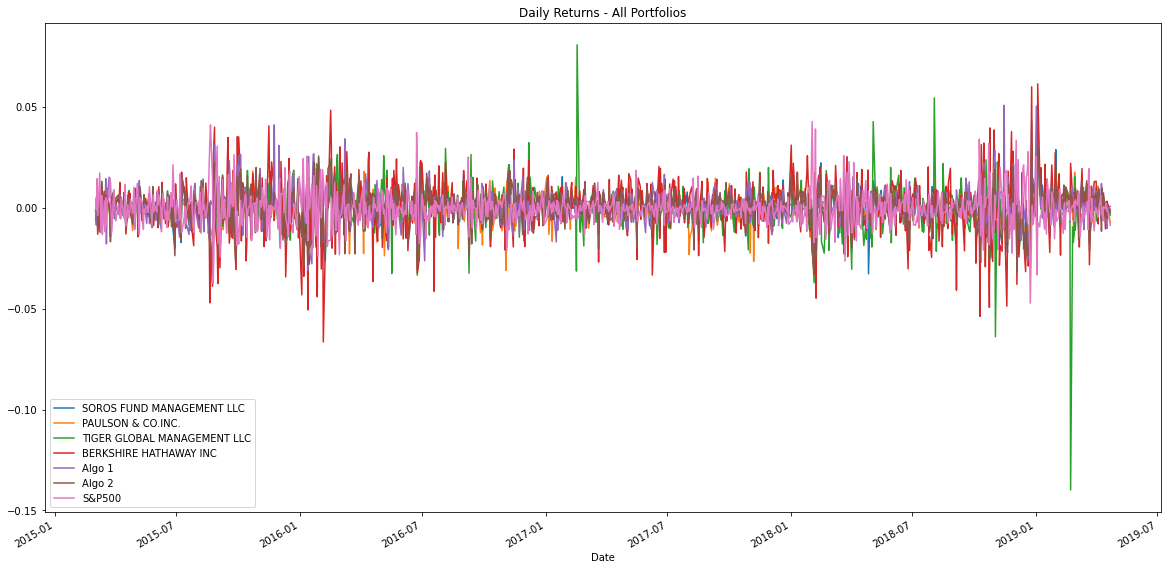

In [22]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title="Daily Returns - All Portfolios");
plt.savefig("Images/DailyReturns.png")

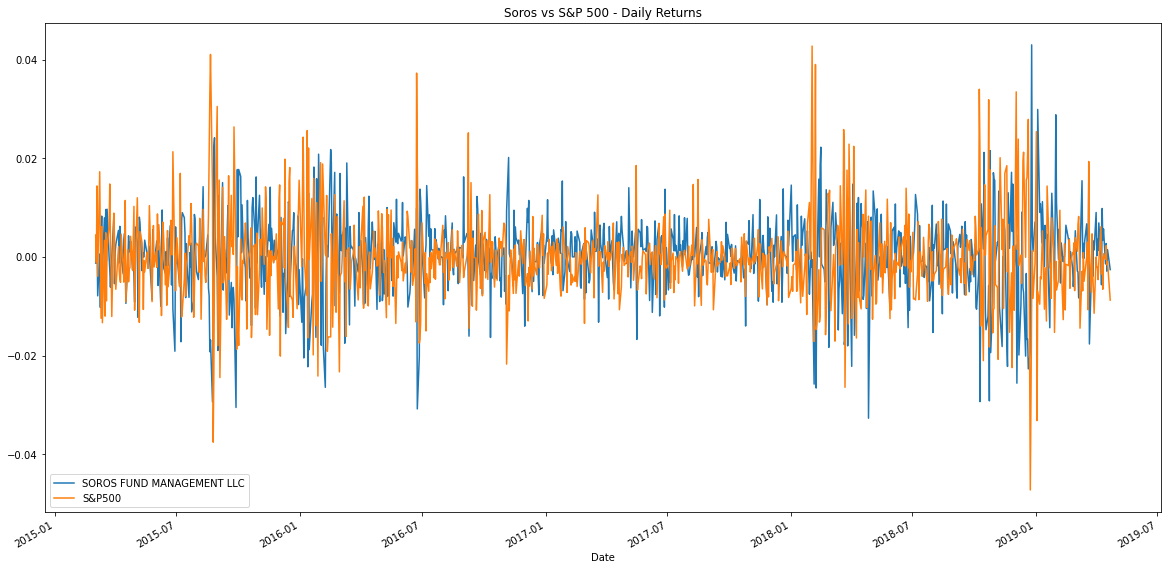

In [23]:
# SOROS vs S&P500
SOROS_sp500 = combined_df[['SOROS FUND MANAGEMENT LLC', 'S&P500']]
SOROS_sp500.plot(figsize = (20,10), title="Soros vs S&P 500 - Daily Returns");
plt.savefig("Images/SorosVsSP500.png")

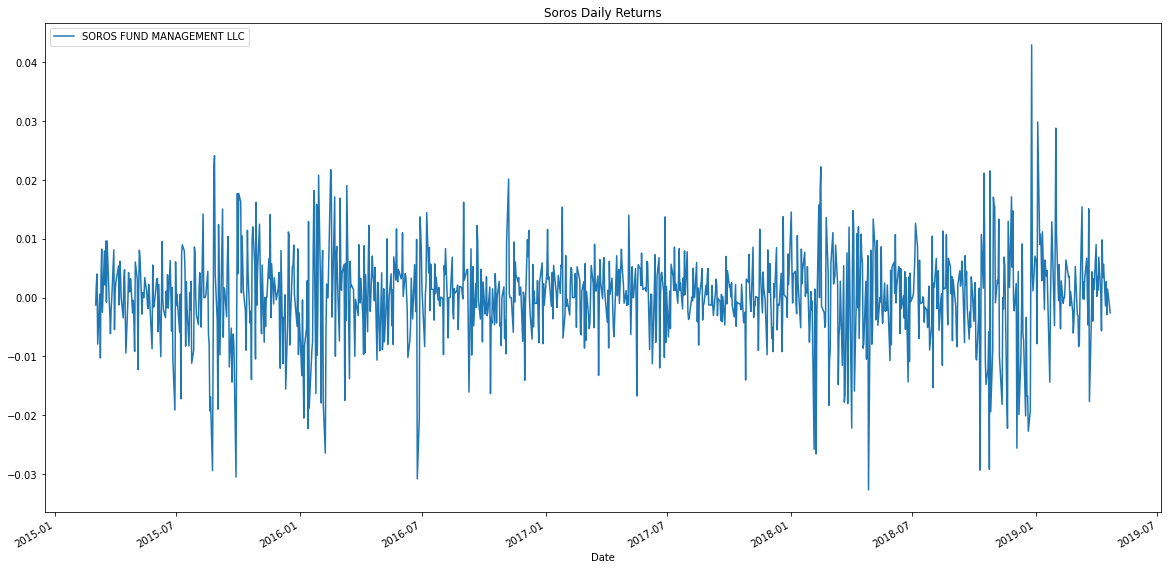

In [24]:
# SOROS Daily Returns
SOROS = combined_df['SOROS FUND MANAGEMENT LLC']
SOROS.plot(figsize = (20,10), legend=True, title="Soros Daily Returns");
plt.savefig("Images/SorosDailyReturns.png")

#### Calculate and Plot cumulative returns.

In [ ]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns

In [26]:
# Grabbing SOROS Daily Returns
SOROS = combined_df['SOROS FUND MANAGEMENT LLC']
SOROS

Date
2015-03-03   -0.001266
2015-03-04    0.002230
2015-03-05    0.004016
2015-03-06   -0.007905
2015-03-09    0.000582
                ...   
2019-04-15   -0.001422
2019-04-16    0.002699
2019-04-17   -0.002897
2019-04-18    0.001448
2019-04-22   -0.002586
Name: SOROS FUND MANAGEMENT LLC, Length: 1042, dtype: float64

In [27]:
# Running cumprod (cumulative product) function over SOROS Daily Returns to calculate overall gain / loss
SOROS_cumprod = (1 + SOROS).cumprod()
SOROS_cumprod

Date
2015-03-03    0.998734
2015-03-04    1.000962
2015-03-05    1.004981
2015-03-06    0.997037
2015-03-09    0.997617
                ...   
2019-04-15    1.157839
2019-04-16    1.160965
2019-04-17    1.157602
2019-04-18    1.159278
2019-04-22    1.156280
Name: SOROS FUND MANAGEMENT LLC, Length: 1042, dtype: float64

In [28]:
# Running cumulative return against initial investment to obtain current market value of investment
initial_investment = 10000
SOROS_profit = initial_investment * SOROS_cumprod
# SOROS_ending_balance = SOROS_profit.loc['2019-04-22']
SOROS_ending_balance = SOROS_profit.iloc[-1]
SOROS_ending_balance.round().astype(int)

11563

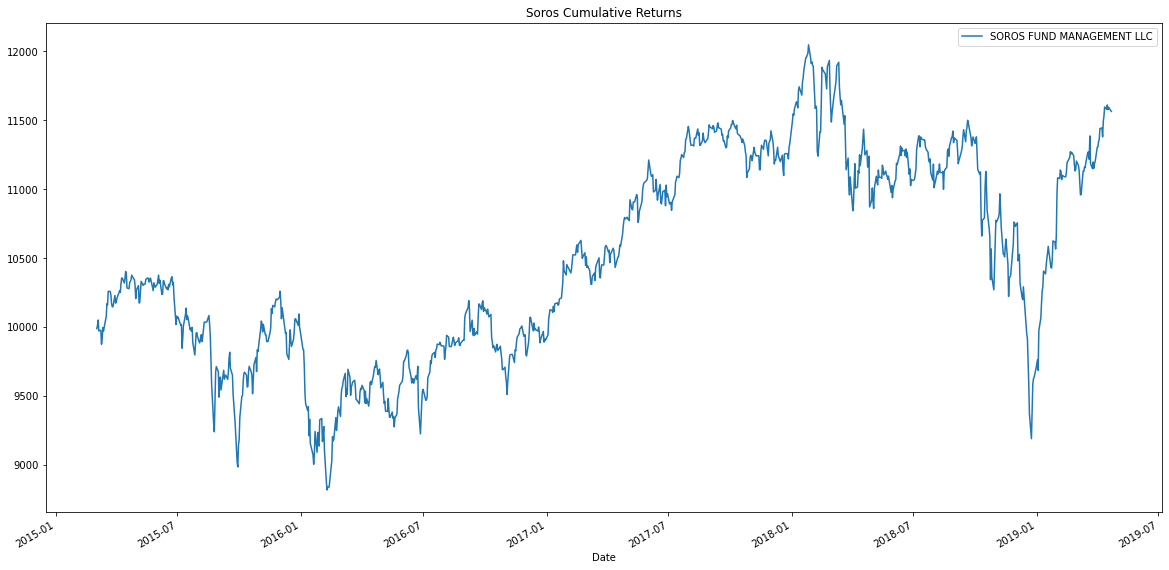

In [29]:
# Plot performance and save to Images
SOROS_profit.plot(figsize=(20,10), legend=True, title="Soros Cumulative Returns");
plt.savefig("Images/SorosCumulativeReturns.png")

In [31]:
# Grabbing PAULSON Daily Returns
PAULSON = combined_df['PAULSON & CO.INC. ']
PAULSON

Date
2015-03-03   -0.004981
2015-03-04    0.003241
2015-03-05    0.004076
2015-03-06   -0.003574
2015-03-09    0.004225
                ...   
2019-04-15   -0.001156
2019-04-16    0.000388
2019-04-17   -0.006467
2019-04-18    0.001222
2019-04-22   -0.007333
Name: PAULSON & CO.INC. , Length: 1042, dtype: float64

In [32]:
# Running cumprod (cumulative product) function over PAULSON Daily Returns to calculate overall gain / loss
PAULSON_cumprod = (1 + PAULSON).cumprod()
PAULSON_cumprod

Date
2015-03-03    0.995019
2015-03-04    0.998245
2015-03-05    1.002314
2015-03-06    0.998731
2015-03-09    1.002951
                ...   
2019-04-15    0.786506
2019-04-16    0.786811
2019-04-17    0.781723
2019-04-18    0.782678
2019-04-22    0.776939
Name: PAULSON & CO.INC. , Length: 1042, dtype: float64

In [33]:
# Running cumulative return against initial investment to obtain current market value of investment
initial_investment = 10000
PAULSON_profit = initial_investment * PAULSON_cumprod
PAULSON_ending_balance = PAULSON_profit.iloc[-1]
PAULSON_ending_balance.round().astype(int)

7769

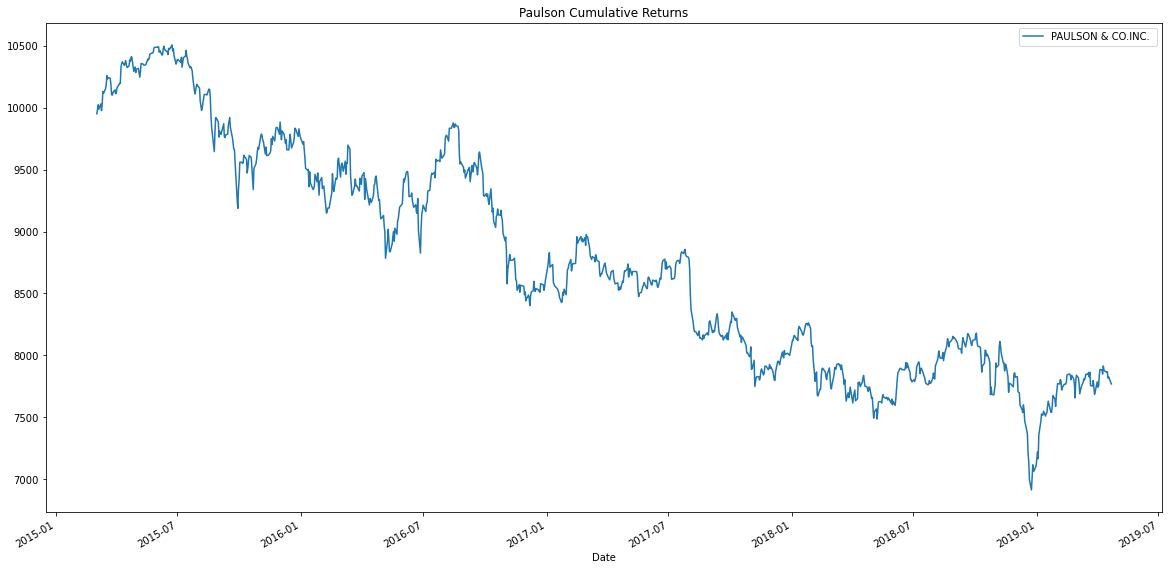

In [35]:
# Plot performance and save to Images
PAULSON_profit.plot(figsize=(20,10), legend=True, title="Paulson Cumulative Returns");
plt.savefig("Images/PaulsonCumulativeReturns.png")

In [36]:
# Grabbing TIGER Daily Returns
TIGER = combined_df['TIGER GLOBAL MANAGEMENT LLC']
TIGER

Date
2015-03-03   -0.000496
2015-03-04   -0.002534
2015-03-05    0.002355
2015-03-06   -0.008481
2015-03-09    0.005843
                ...   
2019-04-15    0.000398
2019-04-16   -0.000831
2019-04-17   -0.004409
2019-04-18    0.000582
2019-04-22   -0.003640
Name: TIGER GLOBAL MANAGEMENT LLC, Length: 1042, dtype: float64

In [37]:
# Running cumprod (cumulative product) function over TIGER Daily Returns to calculate overall gain / loss
TIGER_cumprod = (1 + TIGER).cumprod()
TIGER_cumprod

Date
2015-03-03    0.999504
2015-03-04    0.996972
2015-03-05    0.999319
2015-03-06    0.990844
2015-03-09    0.996633
                ...   
2019-04-15    0.862797
2019-04-16    0.862080
2019-04-17    0.858279
2019-04-18    0.858778
2019-04-22    0.855652
Name: TIGER GLOBAL MANAGEMENT LLC, Length: 1042, dtype: float64

In [38]:
# Running cumulative return against initial investment to obtain current market value of investment
initial_investment = 10000
TIGER_profit = initial_investment * TIGER_cumprod
TIGER_ending_balance = TIGER_profit.iloc[-1]
TIGER_ending_balance.round().astype(int)

8557

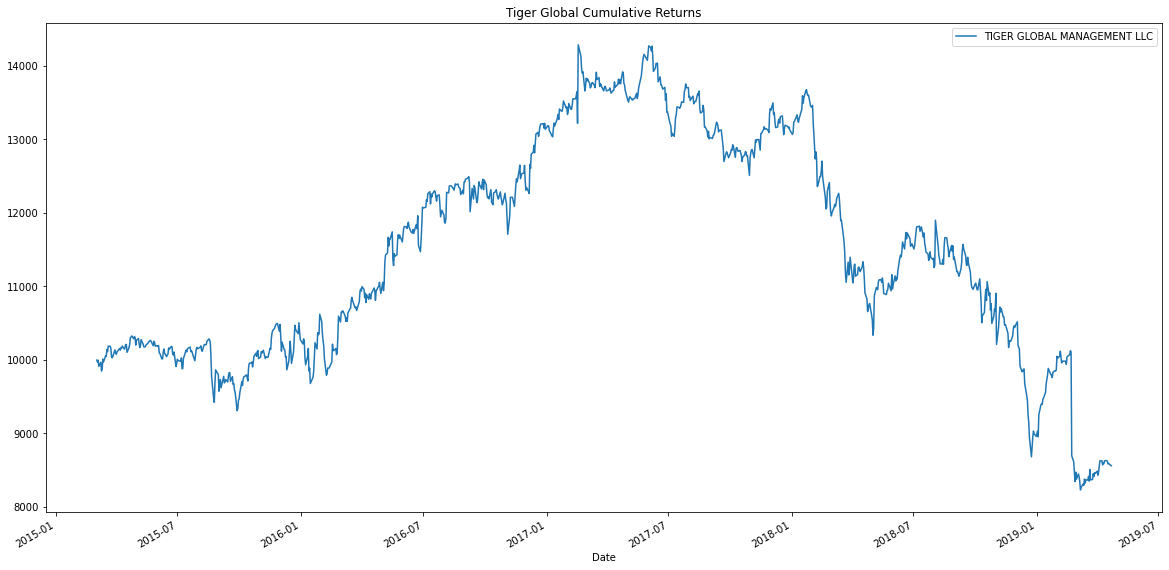

In [39]:
# Plot performance and save to Images
TIGER_profit.plot(figsize=(20,10), legend=True, title="Tiger Global Cumulative Returns");
plt.savefig("Images/TigerCumulativeReturns.png")

In [40]:
# Grabbing BRK Daily Returns
BRK = combined_df['BERKSHIRE HATHAWAY INC']
BRK

Date
2015-03-03   -0.006569
2015-03-04    0.004213
2015-03-05    0.006726
2015-03-06   -0.013098
2015-03-09   -0.001652
                ...   
2019-04-15   -0.010492
2019-04-16    0.000837
2019-04-17    0.003222
2019-04-18    0.001916
2019-04-22   -0.001088
Name: BERKSHIRE HATHAWAY INC, Length: 1042, dtype: float64

In [41]:
# Running cumprod (cumulative product) function over BRK Daily Returns to calculate overall gain / loss
BRK_cumprod = (1 + BRK).cumprod()
BRK_cumprod

Date
2015-03-03    0.993431
2015-03-04    0.997617
2015-03-05    1.004327
2015-03-06    0.991172
2015-03-09    0.989534
                ...   
2019-04-15    1.525584
2019-04-16    1.526861
2019-04-17    1.531781
2019-04-18    1.534716
2019-04-22    1.533046
Name: BERKSHIRE HATHAWAY INC, Length: 1042, dtype: float64

In [42]:
# Running cumulative return against initial investment to obtain current market value of investment
initial_investment = 10000
BRK_profit = initial_investment * BRK_cumprod
BRK_ending_balance = BRK_profit.iloc[-1]
BRK_ending_balance.round().astype(int)

15330

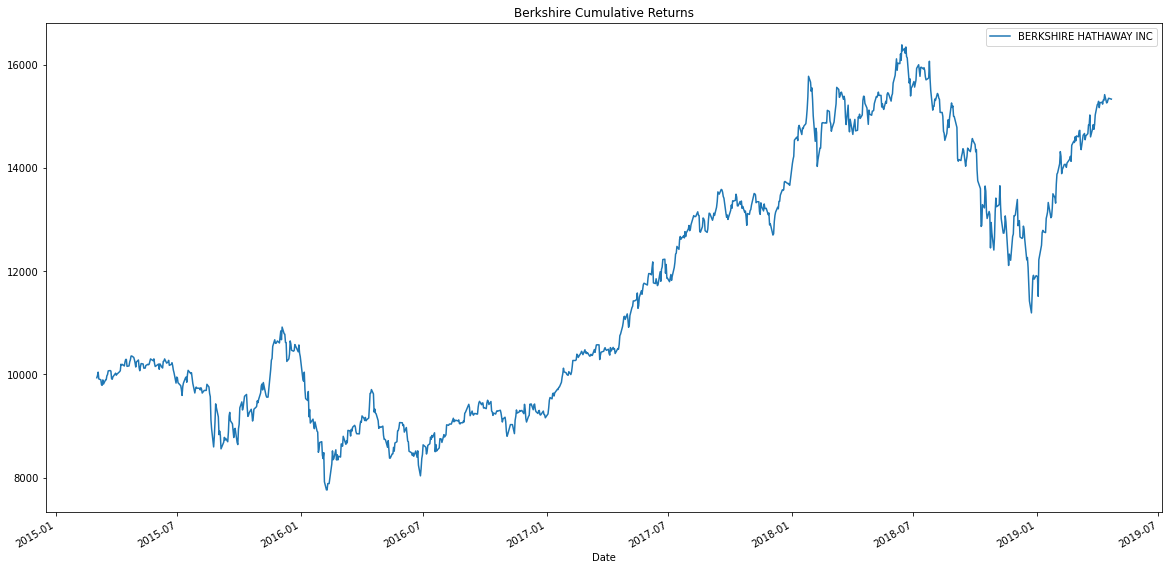

In [43]:
# Plot performance and save to Images
BRK_profit.plot(figsize=(20,10), legend=True, title="Berkshire Cumulative Returns");
plt.savefig("Images/BerkshireCumulativeReturns.png")

In [44]:
# Grabbing Algo 1 Daily Returns
Algo1 = combined_df['Algo 1']
Algo1

Date
2015-03-03   -0.001942
2015-03-04   -0.008589
2015-03-05   -0.000955
2015-03-06   -0.004957
2015-03-09   -0.005447
                ...   
2019-04-15   -0.004331
2019-04-16   -0.006945
2019-04-17   -0.010301
2019-04-18   -0.000588
2019-04-22    0.000677
Name: Algo 1, Length: 1042, dtype: float64

In [45]:
# Running cumprod (cumulative product) function over Algo 1 Daily Returns to calculate overall gain / loss
Algo1_cumprod = (1 + Algo1).cumprod()
Algo1_cumprod

Date
2015-03-03    0.998058
2015-03-04    0.989486
2015-03-05    0.988541
2015-03-06    0.983641
2015-03-09    0.978283
                ...   
2019-04-15    1.958591
2019-04-16    1.944990
2019-04-17    1.924954
2019-04-18    1.923823
2019-04-22    1.925124
Name: Algo 1, Length: 1042, dtype: float64

In [46]:
# Running cumulative return against initial investment to obtain current market value of investment
initial_investment = 10000
Algo1_profit = initial_investment * Algo1_cumprod
Algo1_ending_balance = Algo1_profit.iloc[-1]
Algo1_ending_balance.round().astype(int)

19251

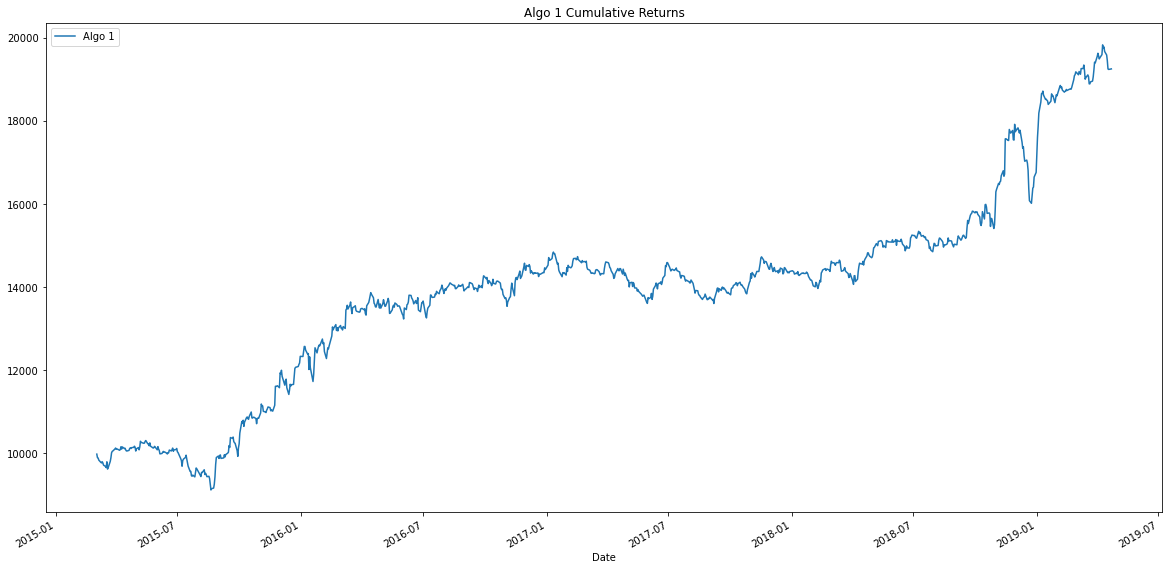

In [47]:
# Plot performance and save to Images
Algo1_profit.plot(figsize=(20,10), legend=True, title="Algo 1 Cumulative Returns");
plt.savefig("Images/Algo1CumulativeReturns.png")

In [48]:
# Grabbing Algo 2 Daily Returns
Algo2 = combined_df['Algo 2']
Algo2

Date
2015-03-03   -0.000949
2015-03-04    0.002416
2015-03-05    0.004323
2015-03-06   -0.011460
2015-03-09    0.001303
                ...   
2019-04-15   -0.004572
2019-04-16    0.002899
2019-04-17   -0.005228
2019-04-18   -0.001229
2019-04-22   -0.001936
Name: Algo 2, Length: 1042, dtype: float64

In [49]:
# Running cumprod (cumulative product) function over Algo 2 Daily Returns to calculate overall gain / loss
Algo2_cumprod = (1 + Algo2).cumprod()
Algo2_cumprod

Date
2015-03-03    0.999051
2015-03-04    1.001464
2015-03-05    1.005794
2015-03-06    0.994267
2015-03-09    0.995563
                ...   
2019-04-15    1.264103
2019-04-16    1.267768
2019-04-17    1.261140
2019-04-18    1.259590
2019-04-22    1.257151
Name: Algo 2, Length: 1042, dtype: float64

In [50]:
# Running cumulative return against initial investment to obtain current market value of investment
initial_investment = 10000
Algo2_profit = initial_investment * Algo2_cumprod
Algo2_ending_balance = Algo2_profit.iloc[-1]
Algo2_ending_balance.round().astype(int)

12572

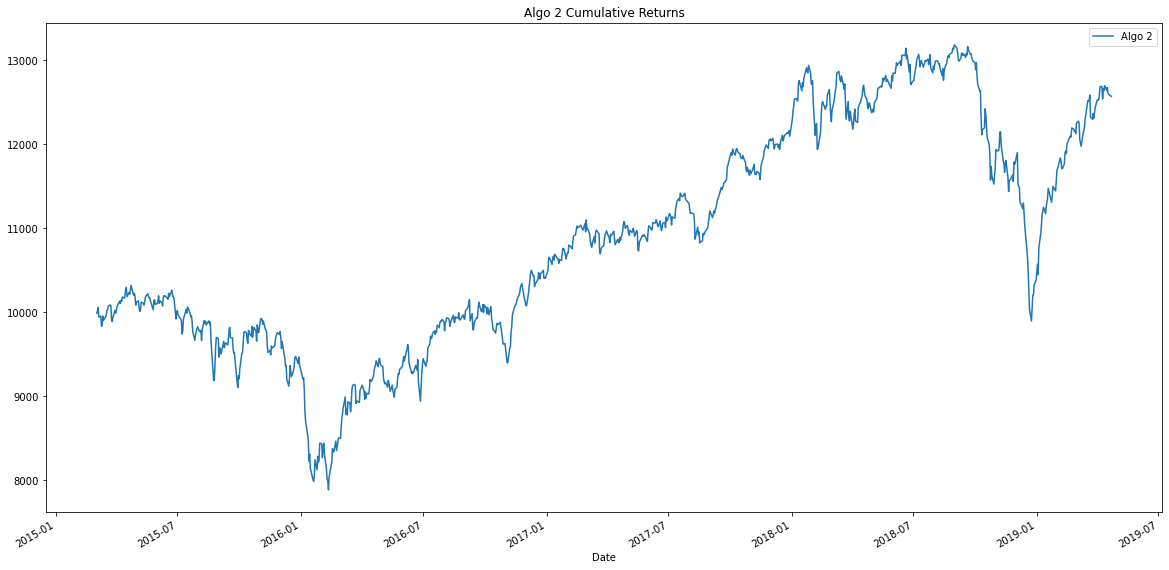

In [51]:
# Plot performance and save to Images
Algo2_profit.plot(figsize=(20,10), legend=True, title="Algo 2 Cumulative Returns");
plt.savefig("Images/Algo2CumulativeReturns.png")

In [52]:
# Grabbing S&P500 Daily Returns
sp500 = combined_df['S&P500']
sp500

Date
2015-03-03    0.004408
2015-03-04   -0.001195
2015-03-05    0.014378
2015-03-06   -0.003929
2015-03-09    0.017254
                ...   
2019-04-15   -0.000509
2019-04-16    0.002279
2019-04-17   -0.001577
2019-04-18   -0.001011
2019-04-22   -0.008764
Name: S&P500, Length: 1042, dtype: float64

In [53]:
# Running cumprod (cumulative product) function over S&P500 Daily Returns to calculate overall gain / loss
sp500_cumprod = (1 + sp500).cumprod()
sp500_cumprod

Date
2015-03-03    1.004408
2015-03-04    1.003208
2015-03-05    1.017632
2015-03-06    1.013634
2015-03-09    1.031123
                ...   
2019-04-15    0.725056
2019-04-16    0.726708
2019-04-17    0.725562
2019-04-18    0.724829
2019-04-22    0.718476
Name: S&P500, Length: 1042, dtype: float64

In [54]:
# Running cumulative return against initial investment to obtain current market value of investment
initial_investment = 10000
sp500_profit = initial_investment * sp500_cumprod
sp500_ending_balance = sp500_profit.iloc[-1]
sp500_ending_balance.round().astype(int)

7185

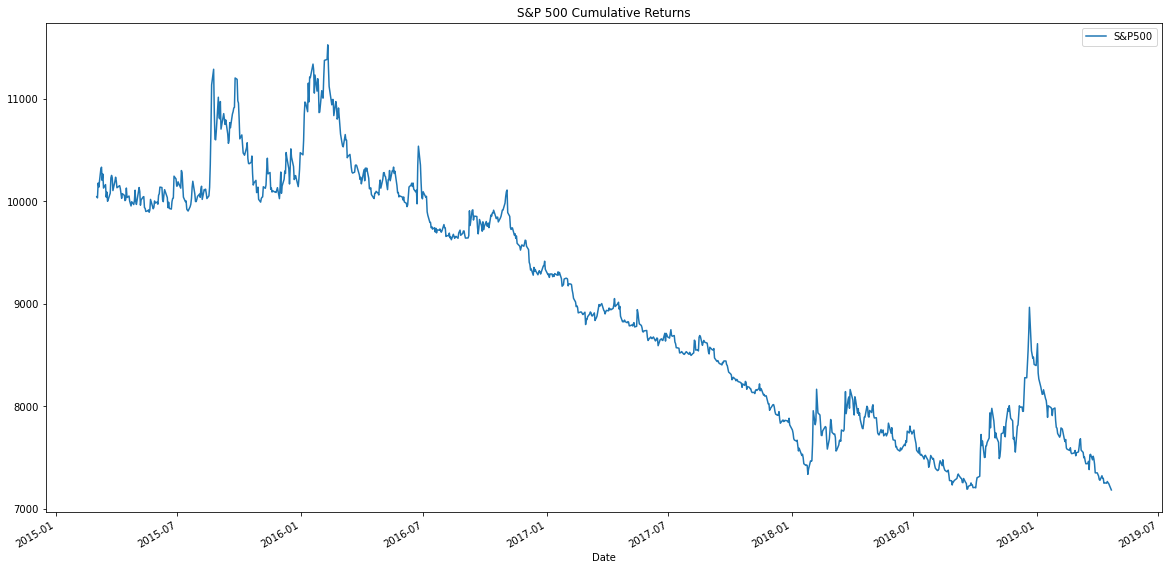

In [55]:
# Plot performance and save to Images
sp500_profit.plot(figsize=(20,10), legend=True, title="S&P 500 Cumulative Returns");
plt.savefig("Images/S&P500CumulativeReturns.png")

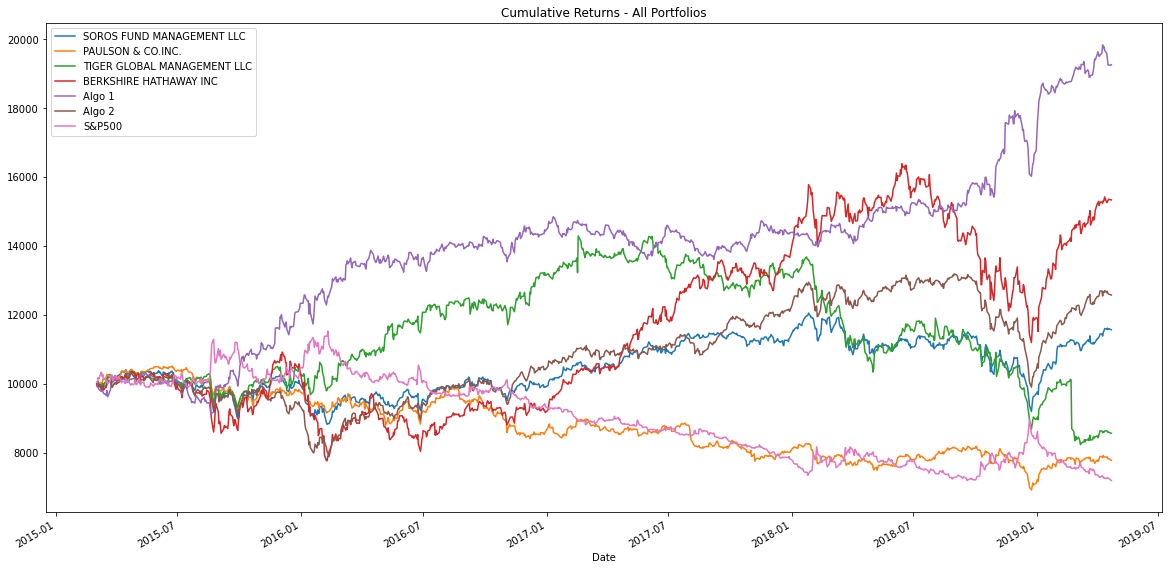

In [56]:
# Overlay of cumulative performances
ax = SOROS_profit.plot(figsize=(20,10), legend=True, title="Cumulative Returns - All Portfolios")
PAULSON_profit.plot(ax=ax, legend=True)
TIGER_profit.plot(ax=ax, legend=True)
BRK_profit.plot(ax=ax, legend=True)
Algo1_profit.plot(ax=ax, legend=True)
Algo2_profit.plot(ax=ax, legend=True)
sp500_profit.plot(ax=ax, legend=True);
plt.savefig("Images/OverlayCumulativeReturns.png")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


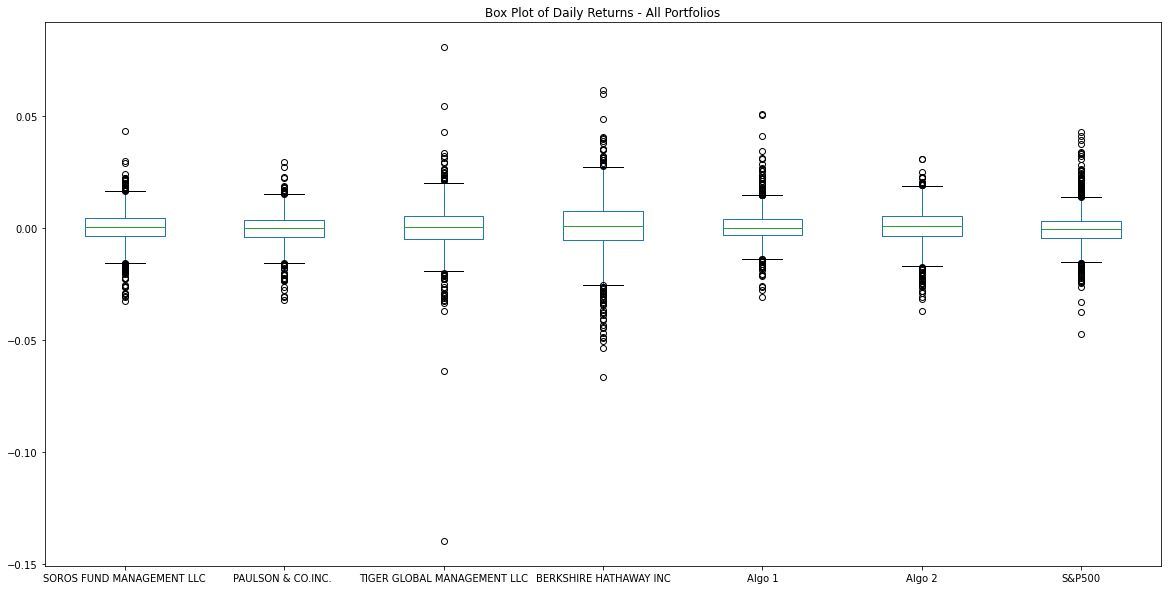

In [58]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10), title="Box Plot of Daily Returns - All Portfolios");
plt.savefig("Images/BoxPlotDailyReturns.png")

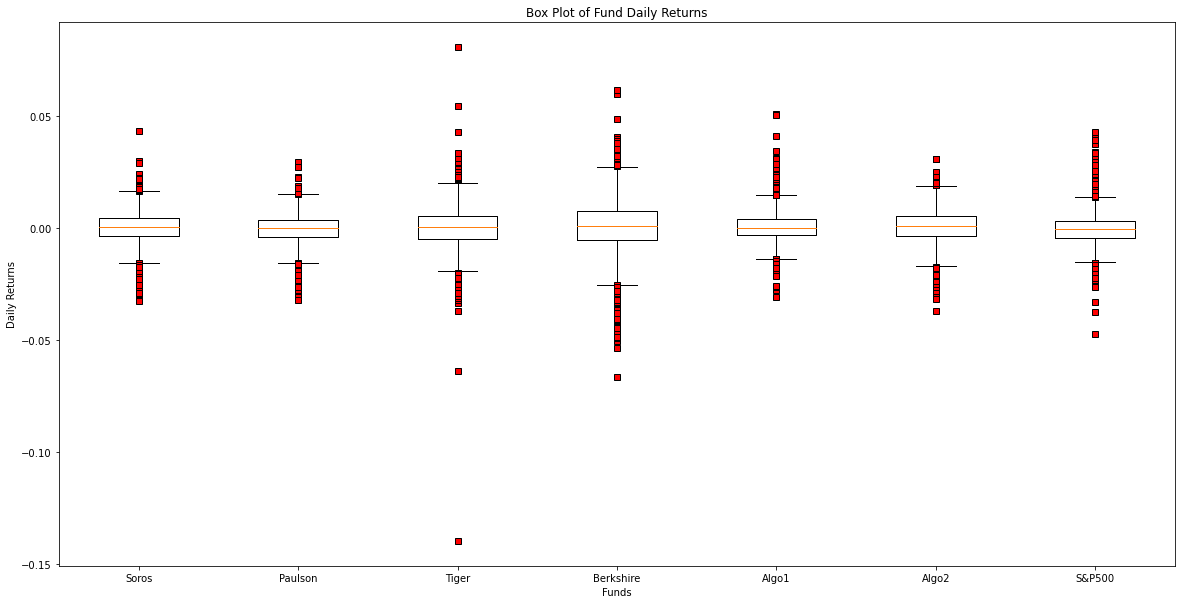

In [59]:
# Creating Boxplot Chart for Fund Daily Returns
returns = [SOROS, PAULSON, TIGER, BRK, Algo1, Algo2, sp500]
funds = ["Soros", "Paulson", "Tiger", "Berkshire", "Algo1", "Algo2", "S&P500"]
fig1, ax1 = plt.subplots(figsize=(20,10))
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(returns, labels=funds, flierprops=red_square)
plt.title("Box Plot of Fund Daily Returns")
plt.ylabel("Daily Returns")
plt.xlabel("Funds");

In [60]:
# Processing IQR info
quartiles = SOROS.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
median = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"The lower quartile of SOROS Returns is: {lowerq}")
print(f"The upper quartile of SOROS Returns is: {upperq}")
print(f"The interquartile range of SOROS Returns is: {iqr}")
print(f"The median of SOROS Returns is: {median}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of SOROS Returns is: -0.0036413571536459133
The upper quartile of SOROS Returns is: 0.004319614371278702
The interquartile range of SOROS Returns is: 0.007960971524924615
The median of SOROS Returns is: 0.0005169370854944955
Values below -0.015582814441032836 could be outliers.
Values above 0.016261071658665624 could be outliers.


In [61]:
# Processing IQR info
quartiles = PAULSON.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
median = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"The lower quartile of PAULSON Returns is: {lowerq}")
print(f"The upper quartile of PAULSON Returns is: {upperq}")
print(f"The interquartile range of PAULSON Returns is: {iqr}")
print(f"The median of PAULSON Returns is: {median}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of PAULSON Returns is: -0.0040439739572191435
The upper quartile of PAULSON Returns is: 0.0036287983055603994
The interquartile range of PAULSON Returns is: 0.0076727722627795425
The median of PAULSON Returns is: 0.0
Values below -0.015553132351388457 could be outliers.
Values above 0.015137956699729713 could be outliers.


In [62]:
# Processing IQR info
quartiles = TIGER.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
median = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"The lower quartile of TIGER Returns is: {lowerq}")
print(f"The upper quartile of TIGER Returns is: {upperq}")
print(f"The interquartile range of TIGER Returns is: {iqr}")
print(f"The median of TIGER Returns is: {median}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of TIGER Returns is: -0.004792495102285716
The upper quartile of TIGER Returns is: 0.005232710639348771
The interquartile range of TIGER Returns is: 0.010025205741634487
The median of TIGER Returns is: 0.0003131847501949281
Values below -0.019830303714737447 could be outliers.
Values above 0.0202705192518005 could be outliers.


In [63]:
# Processing IQR info
quartiles = BRK.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
median = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"The lower quartile of BRK Returns is: {lowerq}")
print(f"The upper quartile of BRK Returns is: {upperq}")
print(f"The interquartile range of BRK Returns is: {iqr}")
print(f"The median of BRK Returns is: {median}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of BRK Returns is: -0.005655461579983063
The upper quartile of BRK Returns is: 0.007564952085284572
The interquartile range of BRK Returns is: 0.013220413665267635
The median of BRK Returns is: 0.0007263369855914359
Values below -0.025486082077884515 could be outliers.
Values above 0.027395572583186024 could be outliers.


In [64]:
# Processing IQR info
quartiles = Algo1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
median = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"The lower quartile of Algo1 Returns is: {lowerq}")
print(f"The upper quartile of Algo1 Returns is: {upperq}")
print(f"The interquartile range of Algo1 Returns is: {iqr}")
print(f"The median of Algo1 Returns is: {median}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Algo1 Returns is: -0.0032572113905614776
The upper quartile of Algo1 Returns is: 0.003874402246493596
The interquartile range of Algo1 Returns is: 0.007131613637055074
The median of Algo1 Returns is: 6.921811902372774e-05
Values below -0.013954631846144087 could be outliers.
Values above 0.014571822702076206 could be outliers.


In [65]:
# Processing IQR info
quartiles = Algo2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
median = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"The lower quartile of Algo2 Returns is: {lowerq}")
print(f"The upper quartile of Algo2 Returns is: {upperq}")
print(f"The interquartile range of Algo2 Returns is: {iqr}")
print(f"The median of Algo2 Returns is: {median}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Algo2 Returns is: -0.0037992511024585274
The upper quartile of Algo2 Returns is: 0.005225972436465473
The interquartile range of Algo2 Returns is: 0.009025223538924
The median of Algo2 Returns is: 0.000698198794613017
Values below -0.017337086410844527 could be outliers.
Values above 0.018763807744851473 could be outliers.


In [66]:
# Processing IQR info
quartiles = sp500.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
median = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"The lower quartile of sp500 Returns is: {lowerq}")
print(f"The upper quartile of sp500 Returns is: {upperq}")
print(f"The interquartile range of sp500 Returns is: {iqr}")
print(f"The median of sp500 Returns is: {median}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of sp500 Returns is: -0.004455535016342604
The upper quartile of sp500 Returns is: 0.0028806110102881366
The interquartile range of sp500 Returns is: 0.007336146026630741
The median of sp500 Returns is: -0.0004500626452186851
Values below -0.015459754056288716 could be outliers.
Values above 0.013884830050234248 could be outliers.


### Calculate Standard Deviations

In [67]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P500                         0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [69]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
print('Berkshire and Tiger are riskier than S&P500 per cell 67')

Berkshire and Tiger are riskier than S&P500 per cell 67


### Calculate the Annualized Standard Deviation

In [70]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P500                         0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

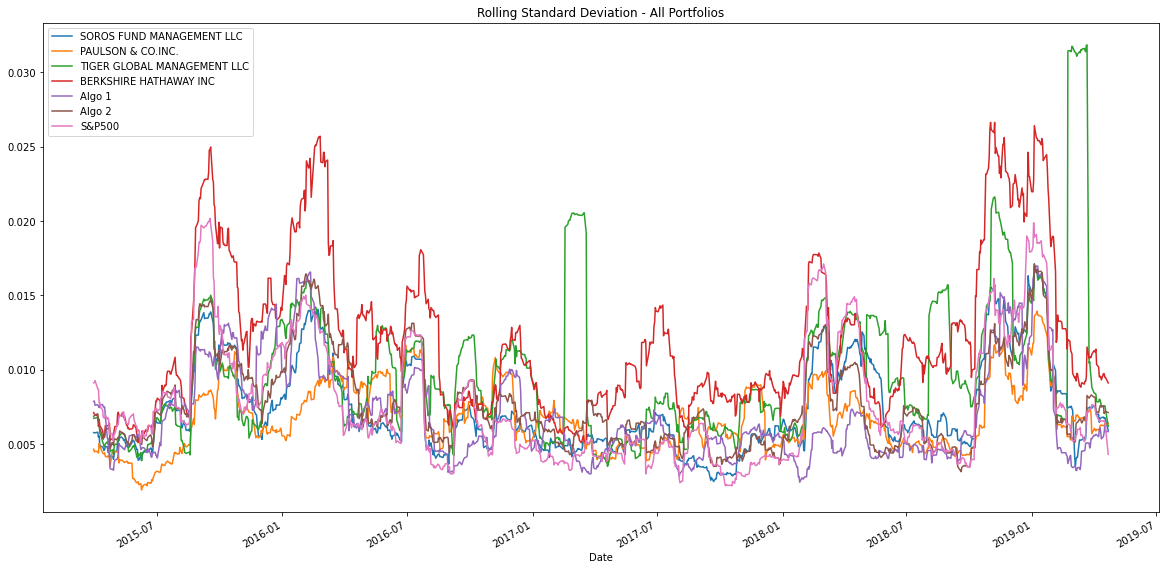

In [72]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling = combined_df.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - All Portfolios")

# Plot the rolling standard deviation
rolling;
plt.savefig("Images/RollingSTD.png")

### Calculate and plot the correlation

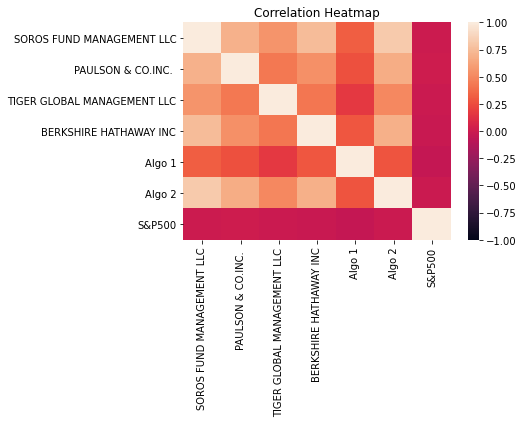

In [76]:
# Calculate the correlation
correlation = combined_df.corr()

# Display the correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1).set(title="Correlation Heatmap");
plt.savefig("Images/HeatMap.png")

In [77]:
# Summing correlation to cross check findings in heatmap
correlation.sum(axis=0).sort_values()

S&P500                         0.962607
Algo 1                         2.299213
TIGER GLOBAL MANAGEMENT LLC    3.089243
PAULSON & CO.INC.              3.639847
BERKSHIRE HATHAWAY INC         3.689310
Algo 2                         3.985390
SOROS FUND MANAGEMENT LLC      4.163224
dtype: float64

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

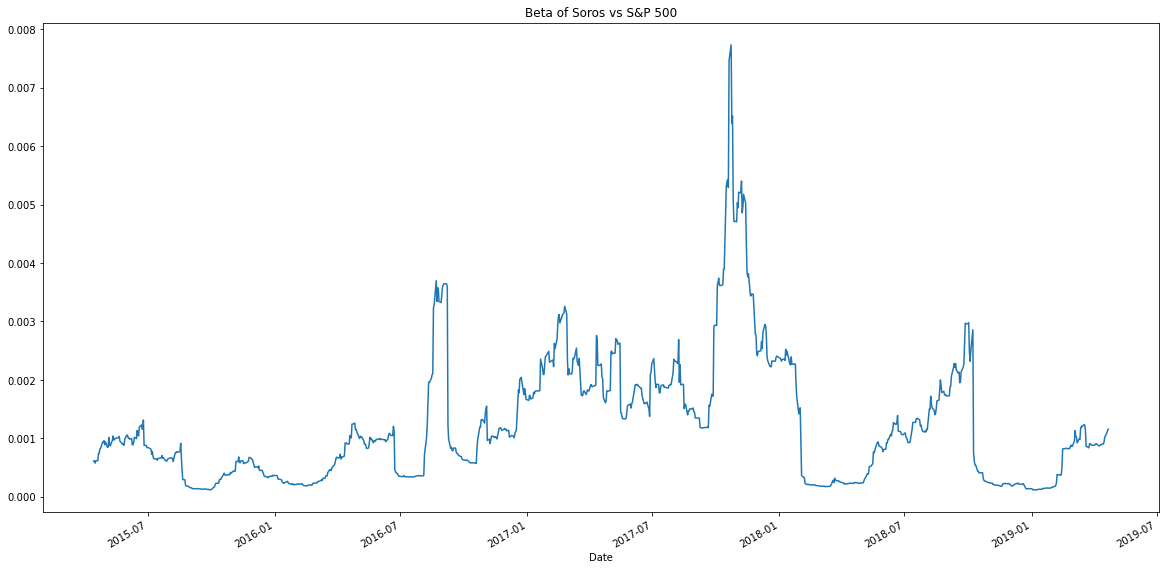

In [79]:
# Calculate covariance of a single portfolio
soros_cov = SOROS.cov(sp500)

# Calculate rolling variance of S&P 500
variance = sp500.rolling(window=30).var()

# Computing beta
soros_beta = soros_cov / variance

# Plot beta trend
soros_beta.plot(figsize=(20,10), title="Beta of Soros vs S&P 500");
plt.savefig("Images/BetaSoros.png")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

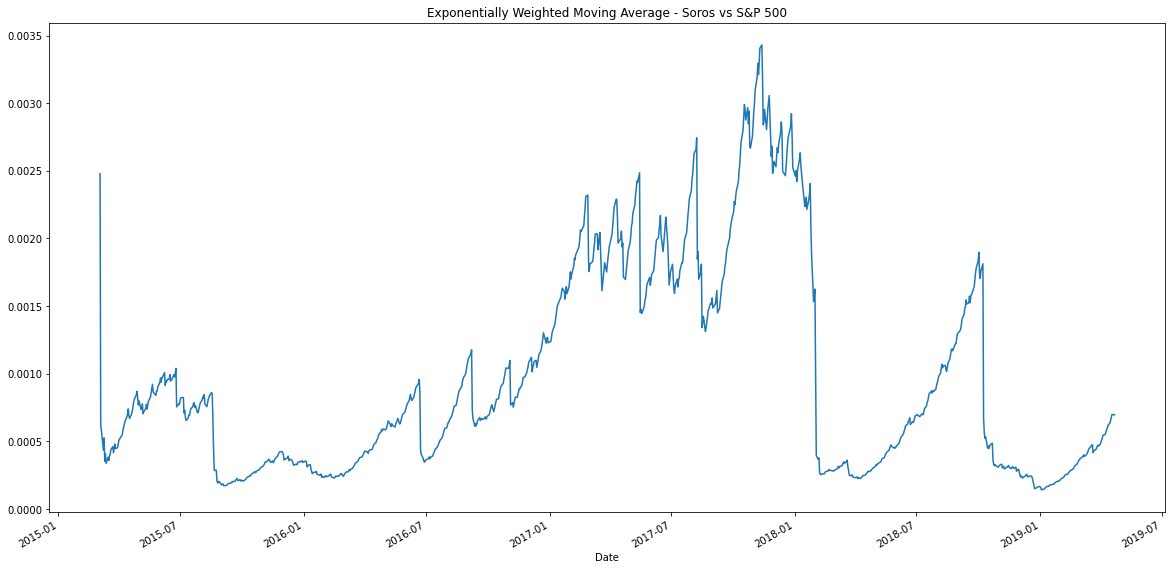

In [80]:
# Use `ewm` to calculate the rolling window
ewm_variance = sp500.ewm(halflife=21).var()

# Computing beta
soros_ewm = soros_cov / ewm_variance

# Plot beta trend
soros_ewm.plot(figsize=(20,10), title="Exponentially Weighted Moving Average - Soros vs S&P 500");
plt.savefig("Images/SorosEWM.png")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [81]:
# Annualized Sharpe Ratios
sharpe = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
dtype: float64

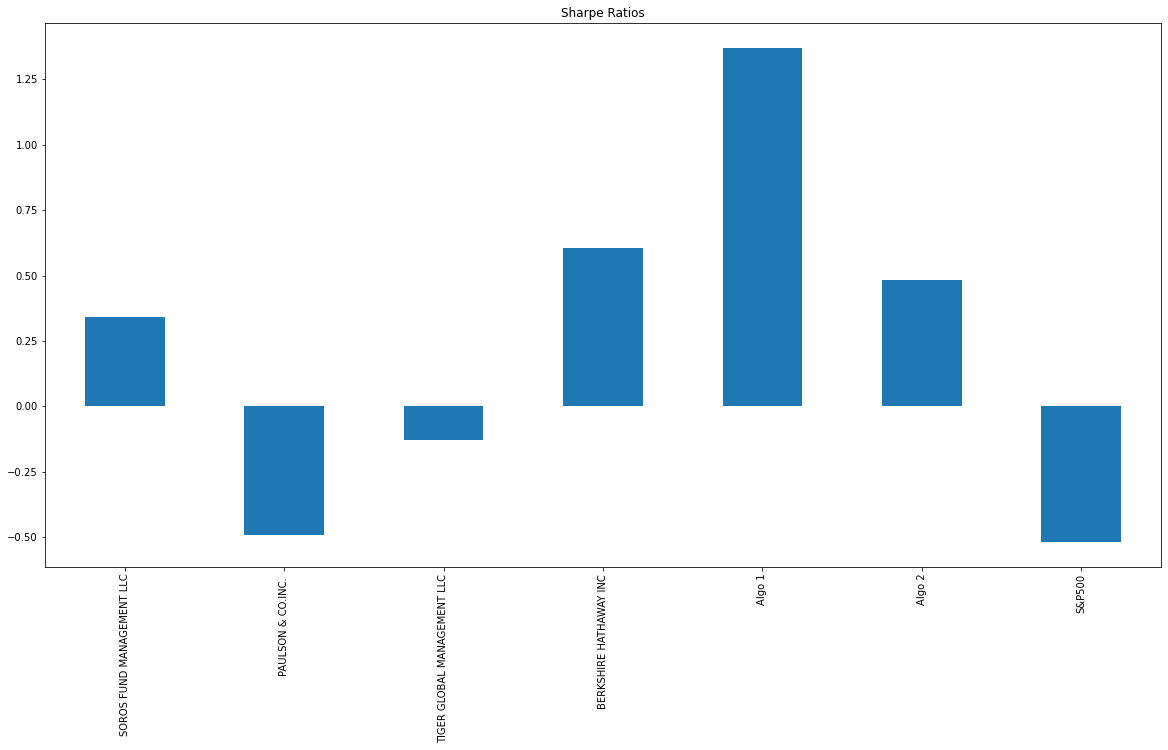

In [82]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot.bar(figsize=(20,10), title='Sharpe Ratios');
plt.savefig("Images/SharpeRatios.png")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo1 crushed it.  Total returns were head and shoulders above the other portfolios, all while assuming almost the least risk in terms of volatility.  Sharpe ratio reflects it.  Low correlation relative to other funds as well.  

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [83]:
# Reading data from 1st stock
filepath = Path('Resources/goog_4years.csv')
goog_df = pd.read_csv(filepath, index_col='Date', infer_datetime_format=True, parse_dates=True)
goog_df

,Close,Ticker
Date,,
2015-03-03,572.07,GOOG
2015-03-04,571.80,GOOG
2015-03-05,573.75,GOOG
2015-03-06,566.13,GOOG
2015-03-09,567.29,GOOG
...,...,...
2019-04-15,1221.10,GOOG
2019-04-16,1227.13,GOOG
2019-04-17,1236.34,GOOG


In [84]:
# Reading data from 2nd stock
filepath = Path('Resources/aapl_4years.csv')
aapl_df = pd.read_csv(filepath, index_col='Date', infer_datetime_format=True, parse_dates=True)
aapl_df

,Close,Ticker
Date,,
2015-03-03,32.34,AAPL
2015-03-04,32.14,AAPL
2015-03-05,31.60,AAPL
2015-03-06,31.65,AAPL
2015-03-09,31.79,AAPL
...,...,...
2019-04-15,49.81,AAPL
2019-04-16,49.81,AAPL
2019-04-17,50.78,AAPL


In [85]:
# Reading data from 3rd stock
filepath = Path('Resources/cost_4years.csv')
cost_df = pd.read_csv(filepath, index_col='Date', infer_datetime_format=True, parse_dates=True)
cost_df

,Close,Ticker
Date,,
2015-03-03,147.37,COST
2015-03-04,147.17,COST
2015-03-05,151.17,COST
2015-03-06,149.54,COST
2015-03-09,150.68,COST
...,...,...
2019-04-15,246.33,COST
2019-04-16,245.34,COST
2019-04-17,245.56,COST


In [86]:
# Combine all stocks in a single DataFrame
joined = pd.concat([goog_df, aapl_df, cost_df], axis='rows', join='inner')
joined

,Close,Ticker
Date,,
2015-03-03,572.07,GOOG
2015-03-04,571.80,GOOG
2015-03-05,573.75,GOOG
2015-03-06,566.13,GOOG
2015-03-09,567.29,GOOG
...,...,...
2019-04-15,246.33,COST
2019-04-16,245.34,COST
2019-04-17,245.56,COST


In [87]:
# Reorganize portfolio data by having a column per symbol
pivot = joined.pivot_table(values='Close', index='Date', columns='Ticker')
pivot

Ticker,AAPL,COST,GOOG
Date,,,
2015-03-03,32.34,147.37,572.07
2015-03-04,32.14,147.17,571.80
2015-03-05,31.60,151.17,573.75
2015-03-06,31.65,149.54,566.13
2015-03-09,31.79,150.68,567.29
...,...,...,...
2019-04-15,49.81,246.33,1221.10
2019-04-16,49.81,245.34,1227.13
2019-04-17,50.78,245.56,1236.34


In [88]:
# Calculate daily returns
port_returns = pivot.pct_change()


# Drop NAs
port_returns = port_returns.dropna()


# Display sample data
port_returns.sample(5)

Ticker,AAPL,COST,GOOG
Date,,,
2016-02-23,-0.022709,0.001999,-0.015019
2017-12-05,-0.000942,-0.009179,0.006479
2015-05-13,0.000953,-0.005761,0.001096
2015-05-05,-0.022381,-0.008576,-0.018455
2018-11-26,0.013699,-0.002772,0.024163


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [89]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = port_returns.dot(weights)

# Display sample data
weighted_returns.sample(5)

Date
2015-10-01   -0.000626
2015-04-17   -0.015541
2015-11-16    0.016930
2018-05-23    0.003850
2017-11-08    0.010402
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [90]:
# Join your returns DataFrame to the original returns DataFrame
final_join = pd.concat([combined_df, weighted_returns], axis='columns', join='inner')
final_join

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,0
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.002671
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.004596
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.007494
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.004699
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,-0.020604
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000306
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292


In [91]:
# Rename column 0 to GAC
GAC_df = final_join.rename(columns={
    0: 'GAC'
})

GAC_df 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,GAC
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.002671
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.004596
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.007494
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.004699
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,-0.020604
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000306
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292


In [92]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
GAC_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P500                         0
GAC                            0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [93]:
# Calculate the annualized `std`
GAC_vol = GAC_df.std() * np.sqrt(252)
GAC_vol = GAC_vol.sort_values(ascending=False)
GAC_vol

BERKSHIRE HATHAWAY INC         0.205148
GAC                            0.178380
TIGER GLOBAL MANAGEMENT LLC    0.173072
S&P500                         0.136359
Algo 2                         0.132475
SOROS FUND MANAGEMENT LLC      0.125406
Algo 1                         0.121058
PAULSON & CO.INC.              0.111556
dtype: float64

### Calculate and plot rolling `std` with 21-day window

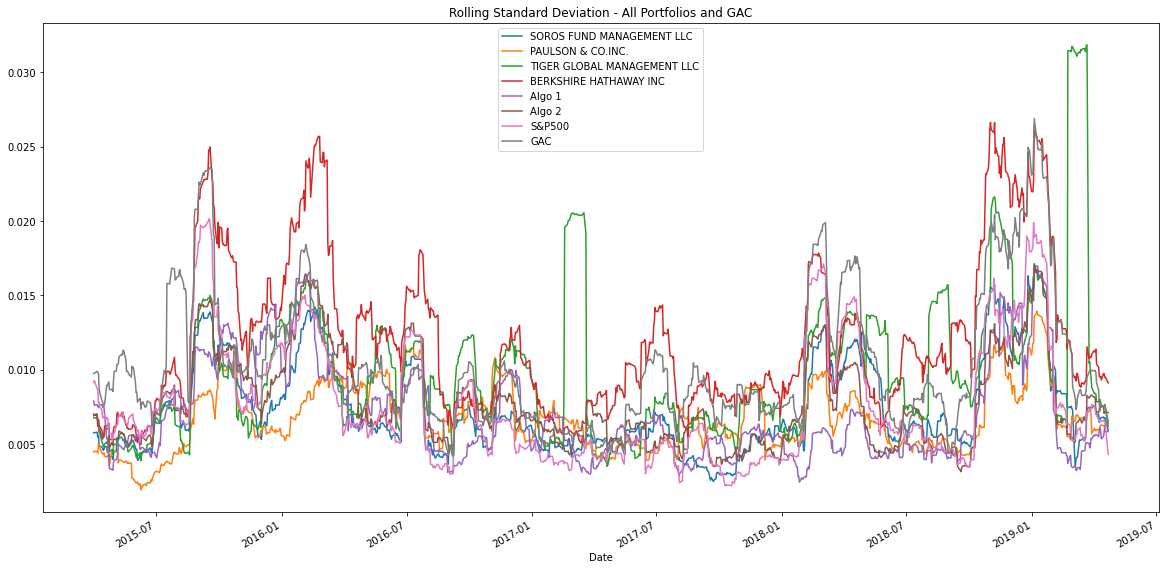

In [94]:
# Calculate rolling standard deviation
GAC_roll = GAC_df.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - All Portfolios and GAC")

# Plot rolling standard deviation
GAC_roll;

### Calculate and plot the correlation

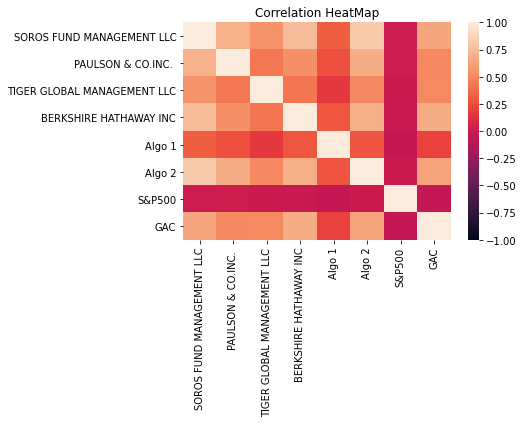

In [96]:
# Calculate and plot the correlation
GAC_corr = GAC_df.corr()
sns.heatmap(GAC_corr, vmin=-1, vmax=1).set(title="Correlation HeatMap");

In [97]:
# Summing correlation to cross check findings in heatmap
GAC_sum = GAC_corr.sum(axis=0).sort_values()
GAC_sum

S&P500                         0.930722
Algo 1                         2.516084
TIGER GLOBAL MANAGEMENT LLC    3.601465
PAULSON & CO.INC.              4.146498
GAC                            4.158345
BERKSHIRE HATHAWAY INC         4.363435
Algo 2                         4.619358
SOROS FUND MANAGEMENT LLC      4.811198
dtype: float64

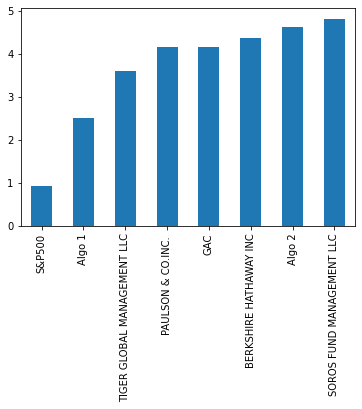

In [98]:
# Visualizing distribution of correlation
GAC_sum.plot.bar();

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

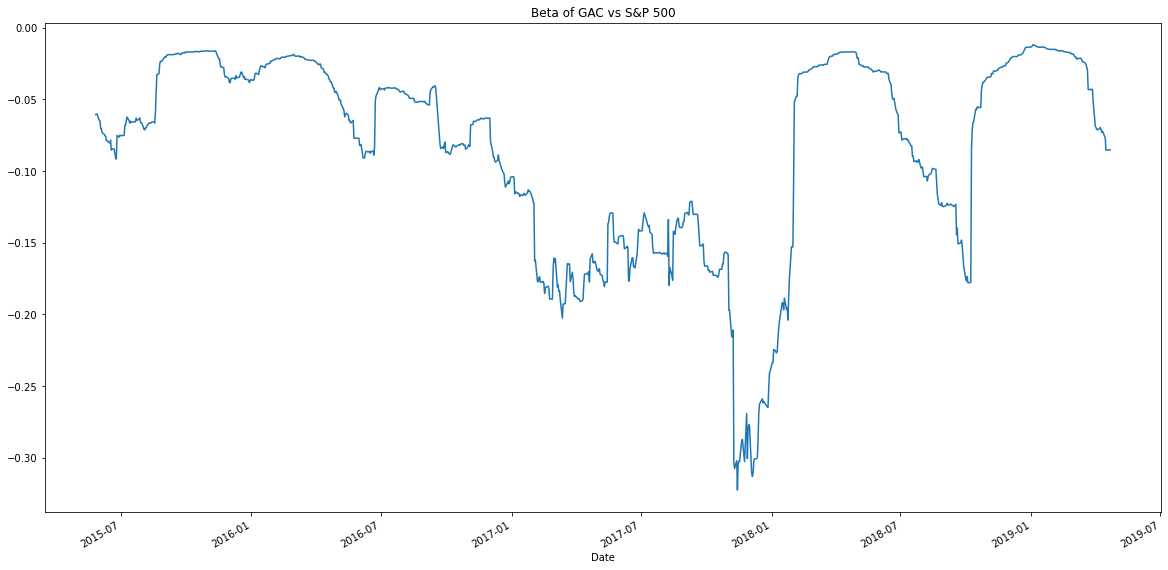

In [99]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
GAC_cov = weighted_returns.cov(sp500)

# Calculate rolling variance of S&P 500
variance = sp500.rolling(window=60).var()

# Computing beta
GAC_beta = GAC_cov / variance

# Plot beta trend
GAC_beta.plot(figsize=(20,10), title="Beta of GAC vs S&P 500");

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [100]:
# Calculate Annualized Sharpe Ratios
sharpe_final = (GAC_df.mean() * 252) / (GAC_df.std() * np.sqrt(252))
sharpe_final

SOROS FUND MANAGEMENT LLC      0.345506
PAULSON & CO.INC.             -0.480959
TIGER GLOBAL MANAGEMENT LLC   -0.129556
BERKSHIRE HATHAWAY INC         0.614872
Algo 1                         1.374206
Algo 2                         0.486307
S&P500                        -0.526730
GAC                            0.931969
dtype: float64

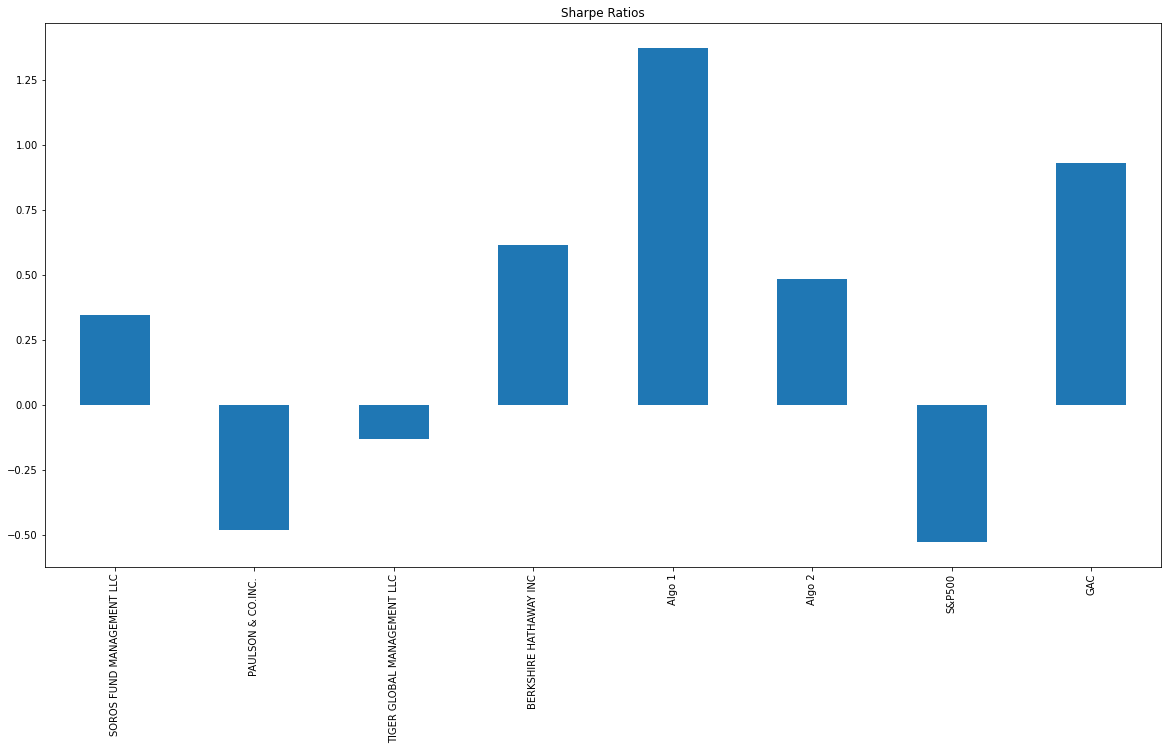

In [101]:
# Visualize the sharpe ratios as a bar plot
sharpe_final.plot.bar(figsize=(20,10), title='Sharpe Ratios');

### How does your portfolio do?

Write your answer here!

In [102]:
# Running cumprod (cumulative product) function over GAC Daily Returns to calculate overall gain / loss
GAC_cumprod = (1 + weighted_returns).cumprod()
GAC_cumprod

Date
2015-03-04    0.997329
2015-03-05    1.001913
2015-03-06    0.994405
2015-03-09    0.999077
2015-03-10    0.978492
                ...   
2019-04-15    1.837775
2019-04-16    1.838338
2019-04-17    1.855420
2019-04-18    1.858378
2019-04-22    1.860548
Length: 1041, dtype: float64

In [103]:
# Running cumulative return against initial investment to obtain current market value of investment
initial_investment = 10000
GAC_profit = initial_investment * GAC_cumprod
GAC_ending_balance = GAC_profit.iloc[-1]
GAC_ending_balance.round().astype(int)

18605

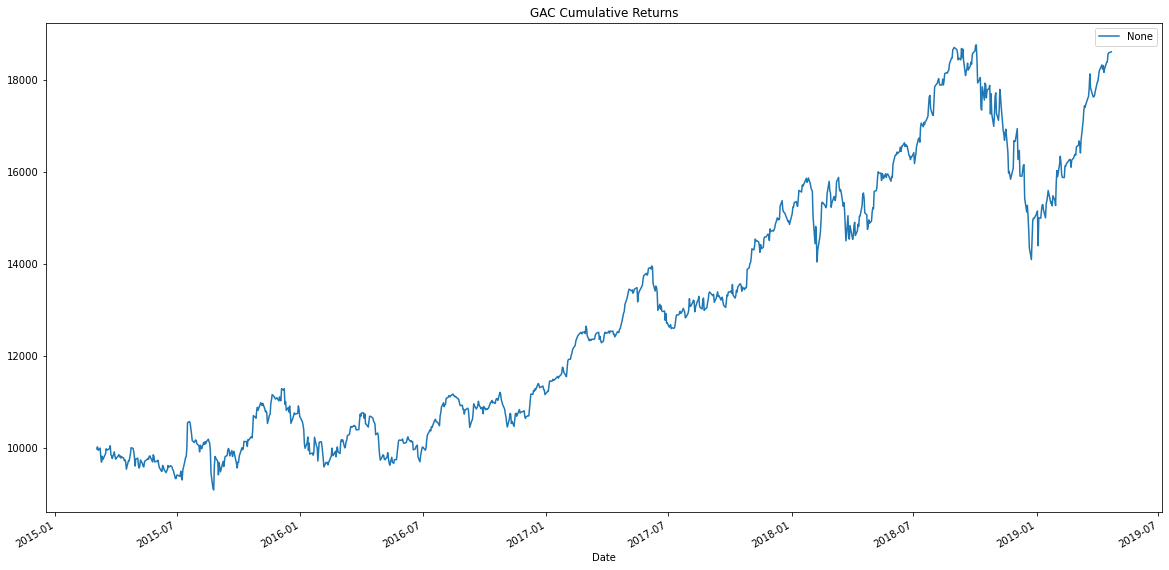

In [104]:
# Plot performance and save to Images
GAC_profit.plot(figsize=(20,10), legend=True, title="GAC Cumulative Returns");
plt.savefig("Images/GAC - CumulativeReturns.png")

GAC came in a solid second behind Algo1.  Overall return for the observed timeframe was around 86% considering an initial investment of 10000 and ending balance of 18605.  Risk was significantly higher though, whereas Algo1 annualized volatility came in at .121, GAC came in at second highest of .178.  Sharpe ratio overall for GAC was still top performing though at .93 and by a margin, next best was BRK at .61.  